In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
df=pd.read_csv('height-weight.csv')

In [41]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


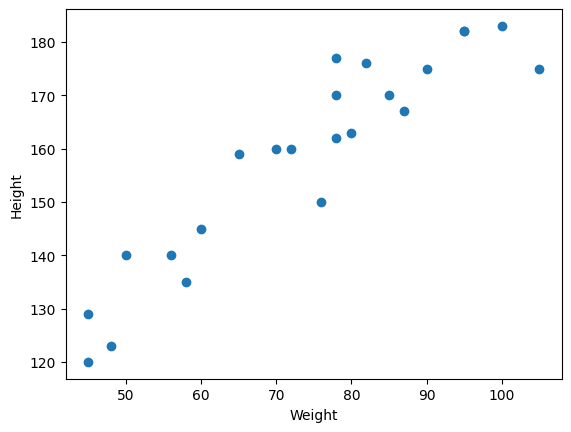

In [44]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [45]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


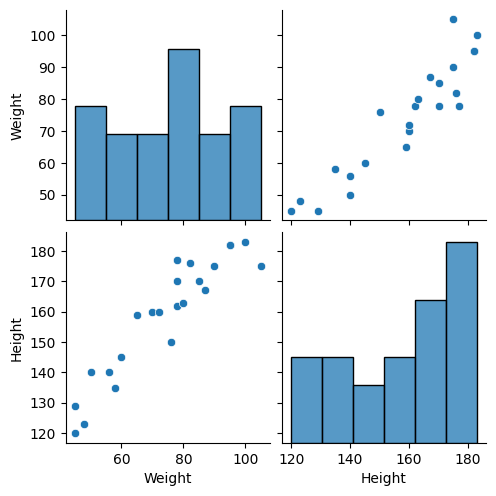

In [48]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [50]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array


In [51]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [52]:
np.array(y).shape

(23,)

In [53]:
## Train Test Split
from sklearn.model_selection import train_test_split


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [55]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [57]:
X_test=scaler.transform(X_test)

In [58]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [59]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [60]:
regression=LinearRegression(n_jobs=-1)

In [61]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [62]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


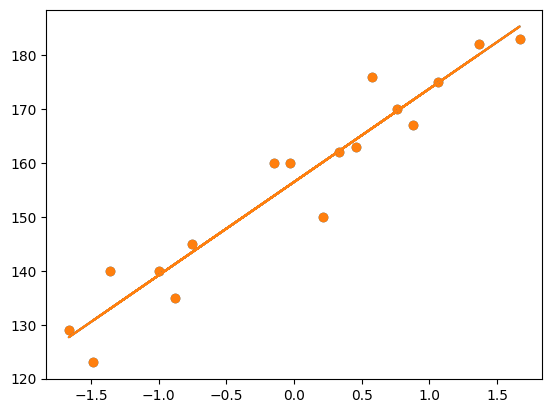

In [64]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [65]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [66]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [68]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
print(score)

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [70]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [71]:
## OLS Linear Regression
import statsmodels.api as sm

In [72]:
model=sm.OLS(y_train,X_train).fit()

In [73]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [74]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 16 Aug 2025   Prob (F-statistic):                       0.664
Time:                        12:07:22   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\soham\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [75]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

C:\Users\soham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])